In [2]:
!pip install pyspark py4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 42 kB/s 
     |████████████████████████████████| 199 kB 64.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=5bd5e7ee2628f194300f7751d64189e3dbd444eb7c6376acbb44adf21d285bd9
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [4]:
from pyspark.sql import SparkSession
from pyspark.ml.stat import Correlation
from pyspark.sql.functions import *
import pandas as pd
import matplotlib.pyplot as plt
import pyspark.sql.functions as f


spark = SparkSession \
    .builder \
    .appName("Project Akhir") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [7]:
df = spark.read.option('header','true').option("inferSchema", "true").csv('cereal.csv')

In [8]:
df.printSchema

<bound method DataFrame.printSchema of DataFrame[name: string, mfr: string, type: string, calories: int, protein: int, fat: int, sodium: int, fiber: double, carbo: double, sugars: int, potass: int, vitamins: int, shelf: int, weight: double, cups: double, rating: double]>

In [14]:
# df.show()

In [ ]:
dfCalo = df.groupby('calories').avg('rating')

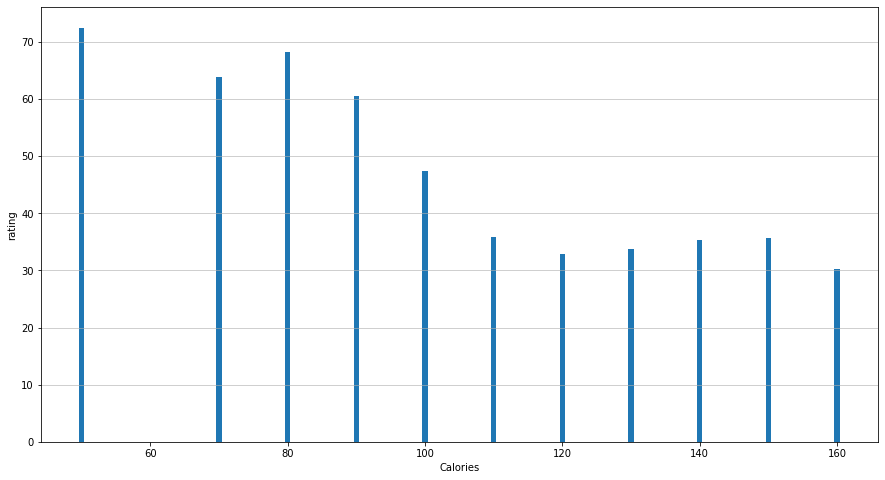

In [ ]:
x = dfCalo.toPandas()["calories"].values.tolist()
y = dfCalo.toPandas()["avg(rating)"].values.tolist()
plt.figure(figsize=(15, 8))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Calories')
plt.ylabel('rating')
plt.bar(x,y)
plt.show()

Rating tertinggi diperoleh ketika calori dibawah 60

In [ ]:
dfProt = df.groupby('protein').avg('rating')

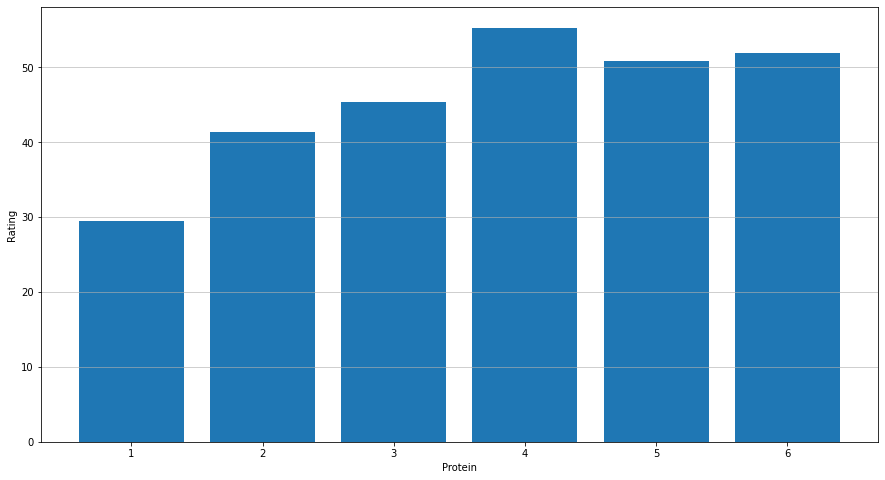

In [ ]:
x = dfProt.toPandas()["protein"].values.tolist()
y = dfProt.toPandas()["avg(rating)"].values.tolist()
plt.figure(figsize=(15, 8))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Protein')
plt.ylabel('Rating')
plt.bar(x,y)
plt.show()

Rating tertinggi diperoleh oleh protein = 4

In [ ]:
dfFat = df.groupby('fat').avg('rating')

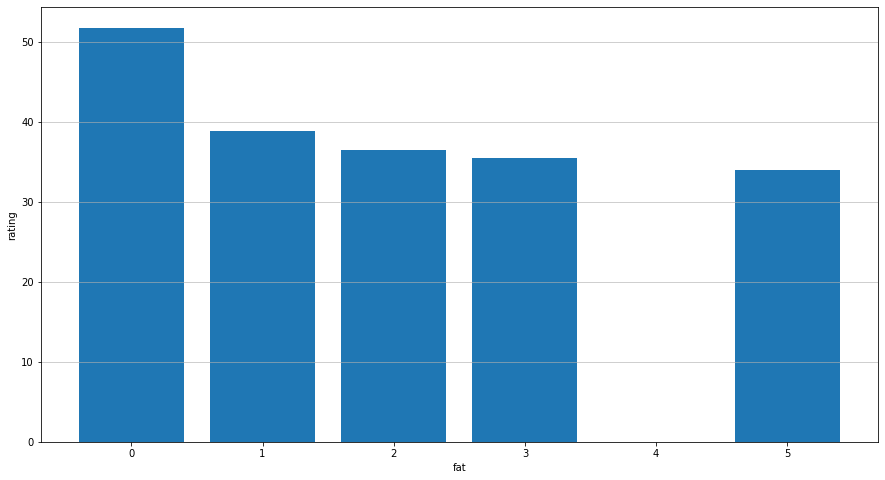

In [ ]:
x = dfFat.toPandas()["fat"].values.tolist()
y = dfFat.toPandas()["avg(rating)"].values.tolist()
plt.figure(figsize=(15, 8))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('fat')
plt.ylabel('rating')
plt.bar(x,y)
plt.show()

Semakin sedikit fat semakin tinggi avg ratingnya

In [ ]:
dfSod = df.groupby('sodium').avg('rating')

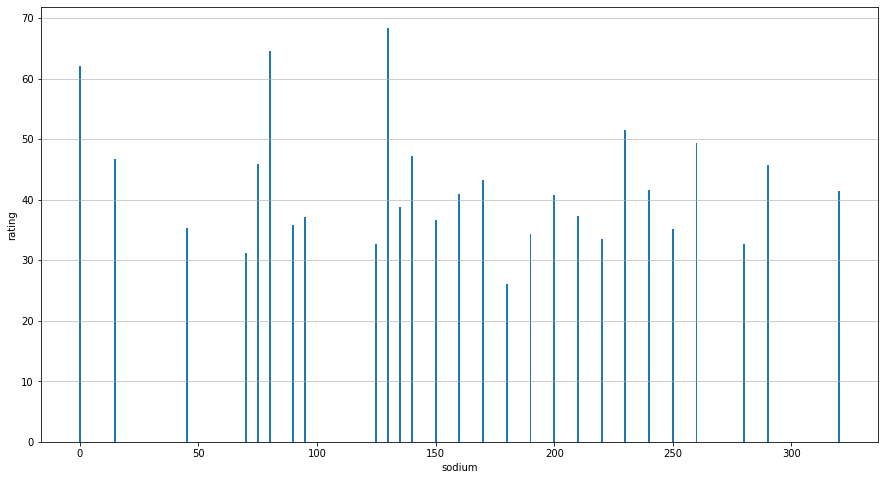

In [ ]:
x = dfSod.toPandas()["sodium"].values.tolist()
y = dfSod.toPandas()["avg(rating)"].values.tolist()
plt.figure(figsize=(15, 8))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('sodium')
plt.ylabel('rating')
plt.bar(x,y)
plt.show()

In [ ]:
dfFib = df.groupby('fiber').avg('rating')

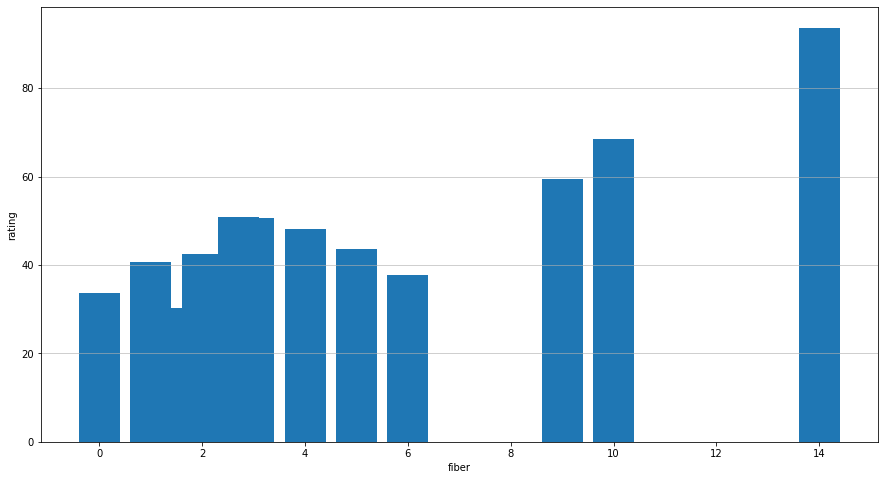

In [ ]:
x = dfFib.toPandas()["fiber"].values.tolist()
y = dfFib.toPandas()["avg(rating)"].values.tolist()
plt.figure(figsize=(15, 8))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('fiber')
plt.ylabel('rating')
plt.bar(x,y)
plt.show()

In [ ]:
dfCar = df.groupby('carbo').avg('rating')

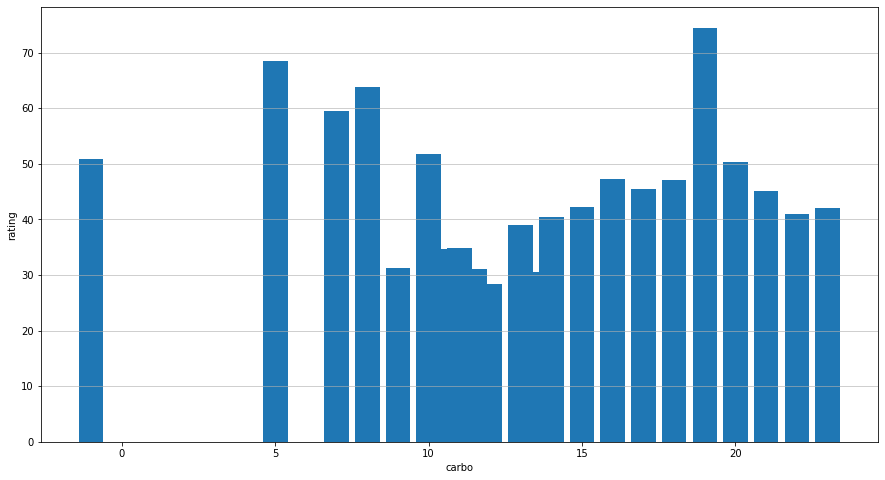

In [ ]:
x = dfCar.toPandas()["carbo"].values.tolist()
y = dfCar.toPandas()["avg(rating)"].values.tolist()
plt.figure(figsize=(15, 8))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('carbo')
plt.ylabel('rating')
plt.bar(x,y)
plt.show()

In [ ]:
dfSug = df.groupby('sugars').avg('rating')

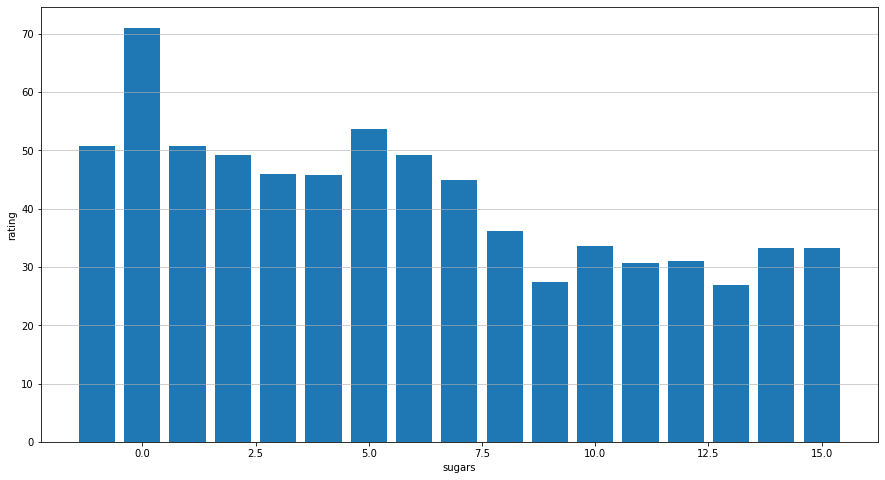

In [ ]:
x = dfSug.toPandas()["sugars"].values.tolist()
y = dfSug.toPandas()["avg(rating)"].values.tolist()
plt.figure(figsize=(15, 8))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('sugars')
plt.ylabel('rating')
plt.bar(x,y)
plt.show()

0 Sugar more rating

In [ ]:
dfPot = df.groupby('potass').avg('rating')

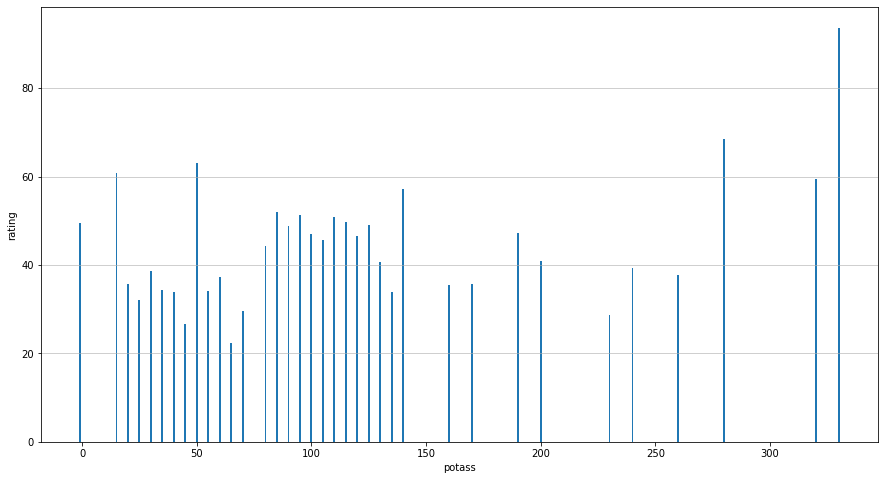

In [ ]:
x = dfPot.toPandas()["potass"].values.tolist()
y = dfPot.toPandas()["avg(rating)"].values.tolist()
plt.figure(figsize=(15, 8))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('potass')
plt.ylabel('rating')
plt.bar(x,y)
plt.show()

Most potassium more rating

In [ ]:
dfVit = df.groupby('vitamins').avg('rating')

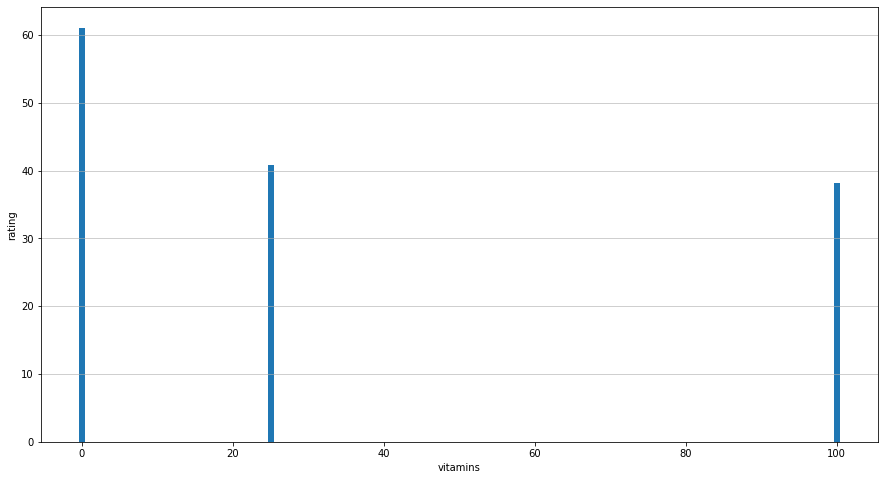

In [ ]:
x = dfVit.toPandas()["vitamins"].values.tolist()
y = dfVit.toPandas()["avg(rating)"].values.tolist()
plt.figure(figsize=(15, 8))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('vitamins')
plt.ylabel('rating')
plt.bar(x,y)
plt.show()

In [20]:
df.corr('calories','rating')

-0.6893760311652587

In [27]:
df.corr('protein','rating')

0.4706184645492595

In [26]:
df.corr('fat','rating')

-0.40928366014781004

In [25]:
df.corr('sodium','rating')

-0.4012952044948486

In [24]:
df.corr('fiber','rating')

0.5841604199515836

In [23]:
df.corr('carbo','rating')

0.05205466123376482

In [22]:
df.corr('sugars','rating')

-0.7596746584301081

In [21]:
df.corr('potass','rating')

0.3801653686941005

In [19]:
df.corr('vitamins','rating')

-0.2405436107690814

LINEAR REGRESSION

In [44]:
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [32]:
df.columns

['name',
 'mfr',
 'type',
 'calories',
 'protein',
 'fat',
 'sodium',
 'fiber',
 'carbo',
 'sugars',
 'potass',
 'vitamins',
 'shelf',
 'weight',
 'cups',
 'rating']

In [34]:
assemble = VectorAssembler(inputCols=['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins'],
                           outputCol = "features")

In [37]:
output = assemble.transform(df)

In [58]:
final_df = output.select('name','features', 'rating')

In [61]:
train_data, test_data = final_df.randomSplit([0.7,0.3])

In [62]:
lr = LinearRegression(featuresCol="features",labelCol="rating")

In [63]:
trained_model = lr.fit(train_data)

In [64]:
result = trained_model.evaluate(train_data)

Koefisien determinasi

In [49]:
print(result.r2)

0.9999999999999997


PREDICTIVE ANALYTICS

In [65]:
test_feature = test_data.select('name','features')

In [66]:
predict = trained_model.transform(test_feature)

In [67]:
predict.show(truncate = False)

+--------------------------------+---------------------------------------------+------------------+
|name                            |features                                     |prediction        |
+--------------------------------+---------------------------------------------+------------------+
|100% Bran                       |[70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0] |68.40297271662575 |
|100% Natural Bran               |[120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0]   |33.9836790829677  |
|Apple Cinnamon Cheerios         |[110.0,2.0,2.0,180.0,1.5,10.5,10.0,70.0,25.0]|29.509540675012936|
|Bran Flakes                     |[90.0,3.0,0.0,210.0,5.0,13.0,5.0,190.0,25.0] |53.313812704209134|
|Clusters                        |[110.0,3.0,2.0,140.0,2.0,13.0,7.0,105.0,25.0]|40.40020797524103 |
|Cocoa Puffs                     |[110.0,1.0,1.0,180.0,0.0,12.0,13.0,55.0,25.0]|22.736446487658675|
|Corn Flakes                     |[100.0,2.0,0.0,290.0,1.0,21.0,2.0,35.0,25.0] |45.86332443012632 |


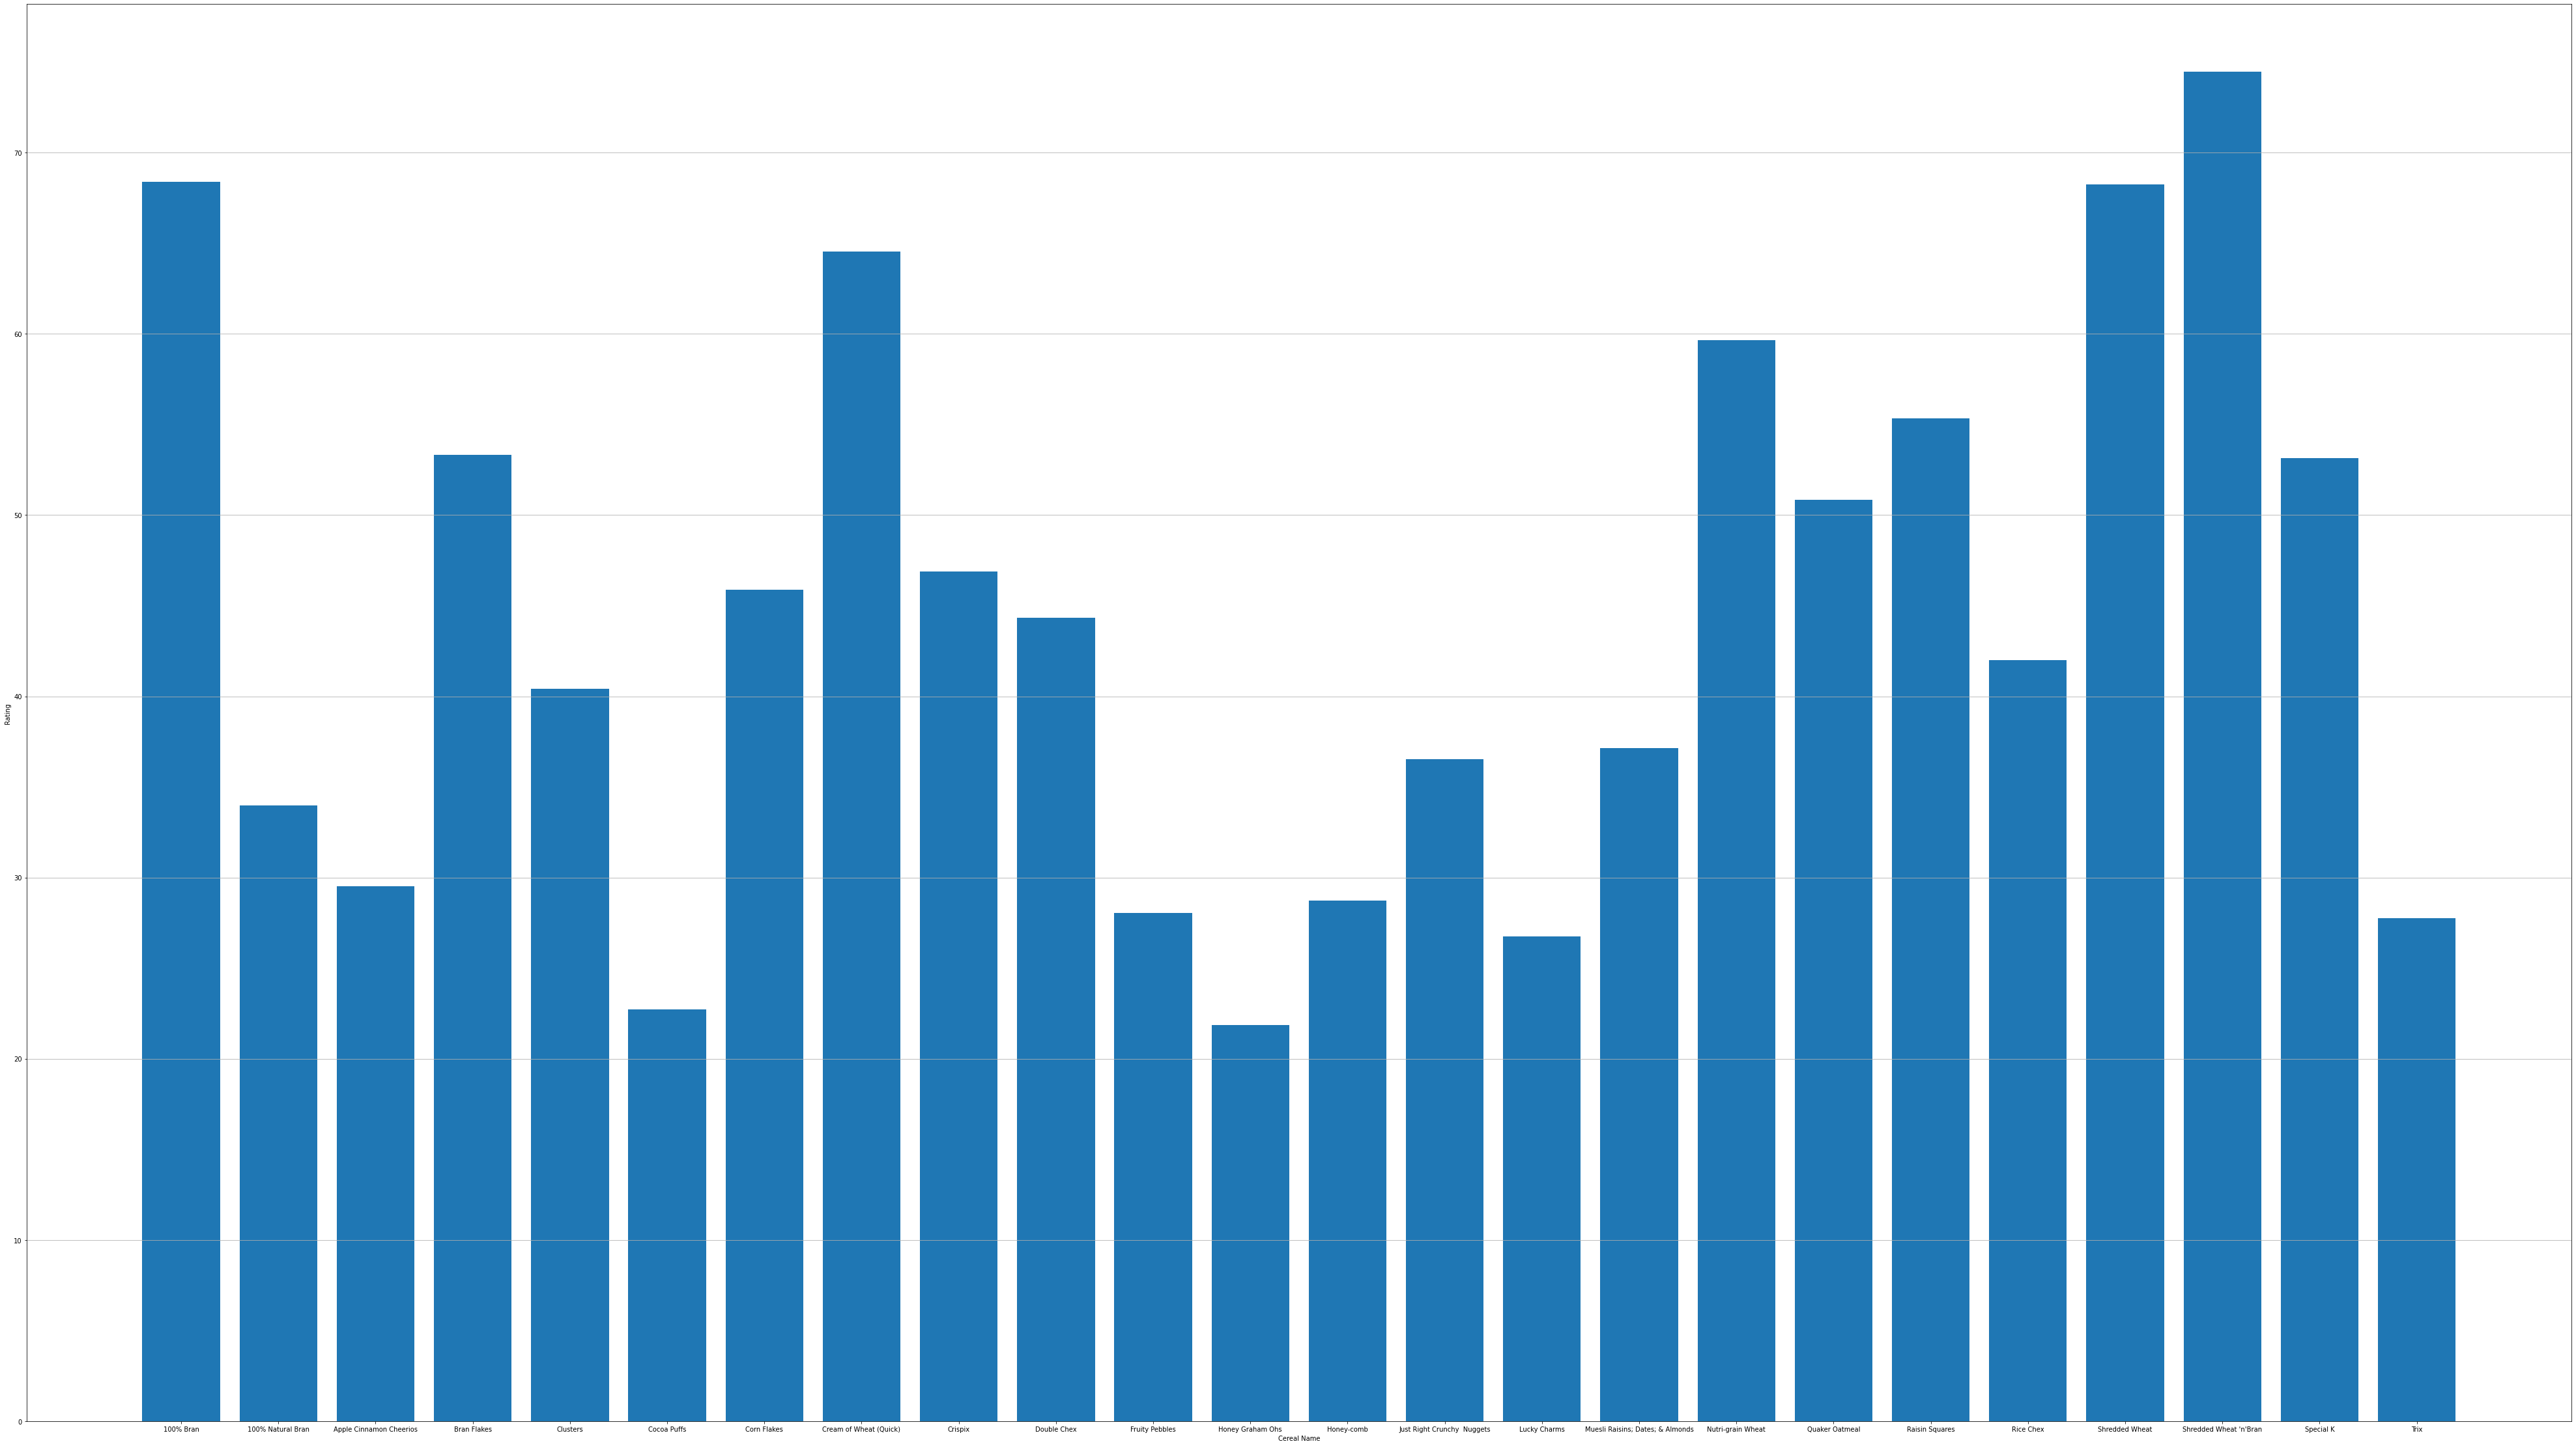

In [80]:
x = predict.toPandas()["name"].values.tolist()
y = predict.toPandas()["prediction"].values.tolist()
plt.figure(figsize=(70, 40))
plt.grid(axis='y', alpha=1)
plt.xlabel('Cereal Name')
plt.ylabel('Rating')

plt.bar(x,y)
plt.show()